Dataset

In [61]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [62]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [63]:
dataset= pd.read_csv("/content/rice-type-classification/riceClassification.csv")
dataset.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [64]:
dataset.dropna(inplace=True)
dataset.drop(['id'], axis = 1, inplace= True)

In [65]:
dataset.shape

(18185, 11)

In [66]:
print(dataset['Class'].unique())

[1 0]


In [67]:
print(dataset["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [68]:
original_df = dataset.copy()

for column in dataset.columns:
  dataset[column] = dataset[column]/dataset[column].abs().max()

In [69]:
dataset

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0
...,...,...,...,...,...,...,...,...,...,...,...
18180,0.573262,0.811219,0.618156,0.971489,0.545785,0.757140,0.562384,0.654774,0.733291,0.744543,0.0
18181,0.742899,0.925674,0.704314,0.971683,0.709121,0.861916,0.730296,0.758107,0.708884,0.745661,0.0
18182,0.623408,0.844800,0.640916,0.972058,0.593296,0.789562,0.633098,0.673049,0.754720,0.747830,0.0
18183,0.583741,0.826356,0.623551,0.972748,0.562227,0.764030,0.555396,0.675248,0.702103,0.751874,0.0


In [70]:
# Taking all the rows but not taking the last column
x = np.array(dataset.iloc[:,:-1])
y = np.array(dataset.iloc[:,-1])

In [71]:
x.shape

(18185, 10)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [73]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

Creating the dataloader to feed to the model.

In [74]:
class DatasetLoader(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype=torch.float32)
    self.Y = torch.tensor(Y, dtype=torch.float32)
  def __len__(self):
    return len(self.X)
  def __getitem__(self, idx):
    return self.X[idx], self.Y[idx]

In [75]:
training_data = DatasetLoader(X_train, y_train)
test_data = DatasetLoader(X_test, y_test)
val_data = DatasetLoader(X_val, y_val)

In [76]:
train_dataLoader = DataLoader(training_data, batch_size=8, shuffle=True)
test_dataLoader = DataLoader(test_data, batch_size=8, shuffle=True)
val_dataLoader = DataLoader(val_data, batch_size=8, shuffle=True)

In [77]:
for x, y in train_dataLoader:
  print("X Data: ",x)
  print("Y Data:", y)
  break

X Data:  tensor([[0.5279, 0.7759, 0.5964, 0.9704, 0.5061, 0.7266, 0.5786, 0.6345, 0.7191,
         0.7381],
        [0.9583, 0.9005, 0.9248, 0.9170, 0.9135, 0.9789, 0.6488, 0.7824, 0.8586,
         0.5524],
        [0.5973, 0.8152, 0.6440, 0.9666, 0.5709, 0.7728, 0.6727, 0.6677, 0.7347,
         0.7182],
        [0.7628, 0.8295, 0.8012, 0.9313, 0.7369, 0.8734, 0.8194, 0.7111, 0.8272,
         0.5873],
        [0.5623, 0.7715, 0.6352, 0.9606, 0.5333, 0.7499, 0.5731, 0.6328, 0.7701,
         0.6891],
        [0.6323, 0.9025, 0.6106, 0.9851, 0.6095, 0.7952, 0.5655, 0.7112, 0.6857,
         0.8386],
        [0.5358, 0.7421, 0.6392, 0.9533, 0.5124, 0.7320, 0.5800, 0.6181, 0.7693,
         0.6587],
        [0.6448, 0.8261, 0.6946, 0.9573, 0.6225, 0.8030, 0.5479, 0.6941, 0.7339,
         0.6748]])
Y Data: tensor([1., 0., 1., 0., 1., 1., 1., 1.])


Building The Model

In [78]:
print(x.shape[1])

10


In [79]:
class MyModel(nn.Module):
  def __init__(self, HIDDEN_NEURONS):
    super().__init__()
    self.input_layer = nn.Linear(x.shape[1], HIDDEN_NEURONS)
    self.linear = nn.Linear(HIDDEN_NEURONS, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x

In [80]:
model = MyModel(HIDDEN_NEURONS = 10)

In [81]:
summary(model, (x.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [82]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [83]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []
epoch = 10
for epoch in range(epoch):
  total_acc_train = 0
  total_acc_val = 0
  total_loss_train = 0
  total_loss_val = 0
  for data in train_dataLoader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss = criterion(prediction,labels)
    total_loss_train += batch_loss.item()
    accuracy = ((prediction).round() == labels).sum().item()
    total_acc_train += accuracy
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    for data in val_dataLoader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      total_loss_val += batch_loss.item()
      accuracy = ((prediction).round() == labels).sum().item()
      total_acc_val += accuracy

  total_loss_train_plot.append(round(total_loss_train/1000,4))
  total_loss_val_plot.append(round(total_loss_val/1000,4))
  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100,4))
  total_acc_val_plot.append(round(total_acc_val/val_data.__len__() * 100,4))

  print(f'''EPOCH NO: {epoch + 1} Train Loss:{round(total_loss_train/1000,4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100,4)}'
        Validation Loss: {round(total_loss_val/1000,4)} Validation Accuracy: {round(total_acc_val/val_data.__len__() * 100,4)} ''')
  print("-"*30)

EPOCH NO: 1 Train Loss:0.6884 Train Accuracy: 89.7792'
        Validation Loss: 0.0518 Validation Accuracy: 98.6804 
------------------------------
EPOCH NO: 2 Train Loss:0.1528 Train Accuracy: 98.4131'
        Validation Loss: 0.0206 Validation Accuracy: 98.9003 
------------------------------
EPOCH NO: 3 Train Loss:0.0909 Train Accuracy: 98.4759'
        Validation Loss: 0.0153 Validation Accuracy: 98.9736 
------------------------------
EPOCH NO: 4 Train Loss:0.0776 Train Accuracy: 98.5152'
        Validation Loss: 0.0137 Validation Accuracy: 98.937 
------------------------------
EPOCH NO: 5 Train Loss:0.0731 Train Accuracy: 98.5623'
        Validation Loss: 0.0131 Validation Accuracy: 98.937 
------------------------------
EPOCH NO: 6 Train Loss:0.0704 Train Accuracy: 98.5781'
        Validation Loss: 0.0127 Validation Accuracy: 98.8636 
------------------------------
EPOCH NO: 7 Train Loss:0.0699 Train Accuracy: 98.5466'
        Validation Loss: 0.0127 Validation Accuracy: 98.753

Working with Squeeze

In [84]:
data = torch.rand(8,1)
print("Before: ", data)
print(data.shape)
data = data.squeeze(dim=1)
print("After:", data)
print(data.shape)

Before:  tensor([[0.4965],
        [0.6673],
        [0.0076],
        [0.3075],
        [0.8893],
        [0.7713],
        [0.5125],
        [0.3790]])
torch.Size([8, 1])
After: tensor([0.4965, 0.6673, 0.0076, 0.3075, 0.8893, 0.7713, 0.5125, 0.3790])
torch.Size([8])


In [85]:
# It removes dim only if its 1
x = torch.randn(1, 3, 1, 5)

torch.squeeze(x, dim=0).shape  # Removes dim 0 → [3, 1, 5]
torch.squeeze(x, dim=2).shape  # Removes dim 2 → [1, 3, 5]
torch.squeeze(x, dim=1).shape  # Dim 1 is size 3, so no change → [1, 3, 1, 5]

torch.Size([1, 3, 1, 5])

In [86]:
with torch.no_grad():
  total_loss_test = 0
  total_accuracy_test = 0
  for data in test_dataLoader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test
    accuracy = ((prediction).round() == labels).sum().item()
    total_accuracy_test += accuracy

  print("Accuracy: ", round(total_accuracy_test/test_data.__len__() * 100,4))
  # print("Loss: ", round(total_loss_test/test_data.__len__() * 100,4))


Accuracy:  98.5704


Visualization

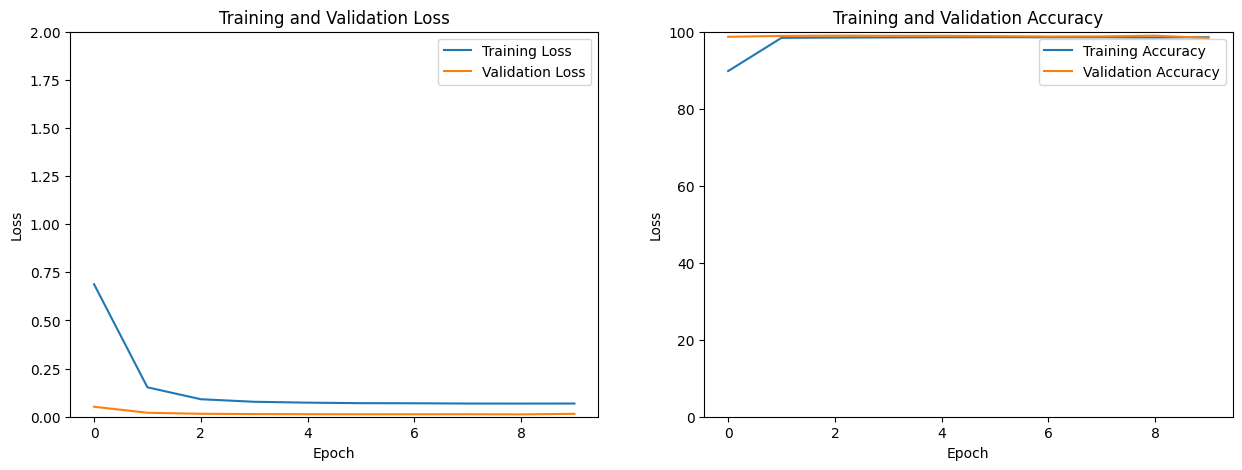

In [87]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axs[0].plot(total_loss_train_plot, label = "Training Loss")
axs[0].plot(total_loss_val_plot, label = "Validation Loss")
axs[0].set_title("Training and Validation Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].set_ylim(0,2)
axs[0].legend()


axs[1].plot(total_acc_train_plot, label = "Training Accuracy")
axs[1].plot(total_acc_val_plot, label = "Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].set_ylim(0,100)
axs[1].legend()

plt.show()